In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataFrame = pd.read_excel("merc.xlsx")

In [3]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [4]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
dataFrame.isnull()

,year,price,transmission,mileage,tax,mpg,engineSize
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13114,False,False,False,False,False,False,False
13115,False,False,False,False,False,False,False
13116,False,False,False,False,False,False,False
13117,False,False,False,False,False,False,False


In [6]:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

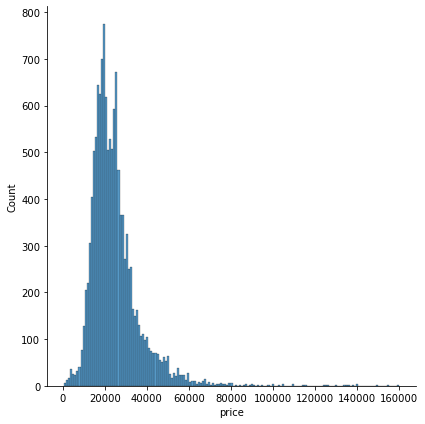

In [7]:
# Yukarda görüldüğü gibi veri setimizde herhangi bir sıkıntı yok
# Şimdi verilerimizi görselleştirip analiz edelim.

# plt.figure(figsize = (7, 5))
sbn.displot(dataFrame["price"], height = 6, aspect = 1)
# plt.show()

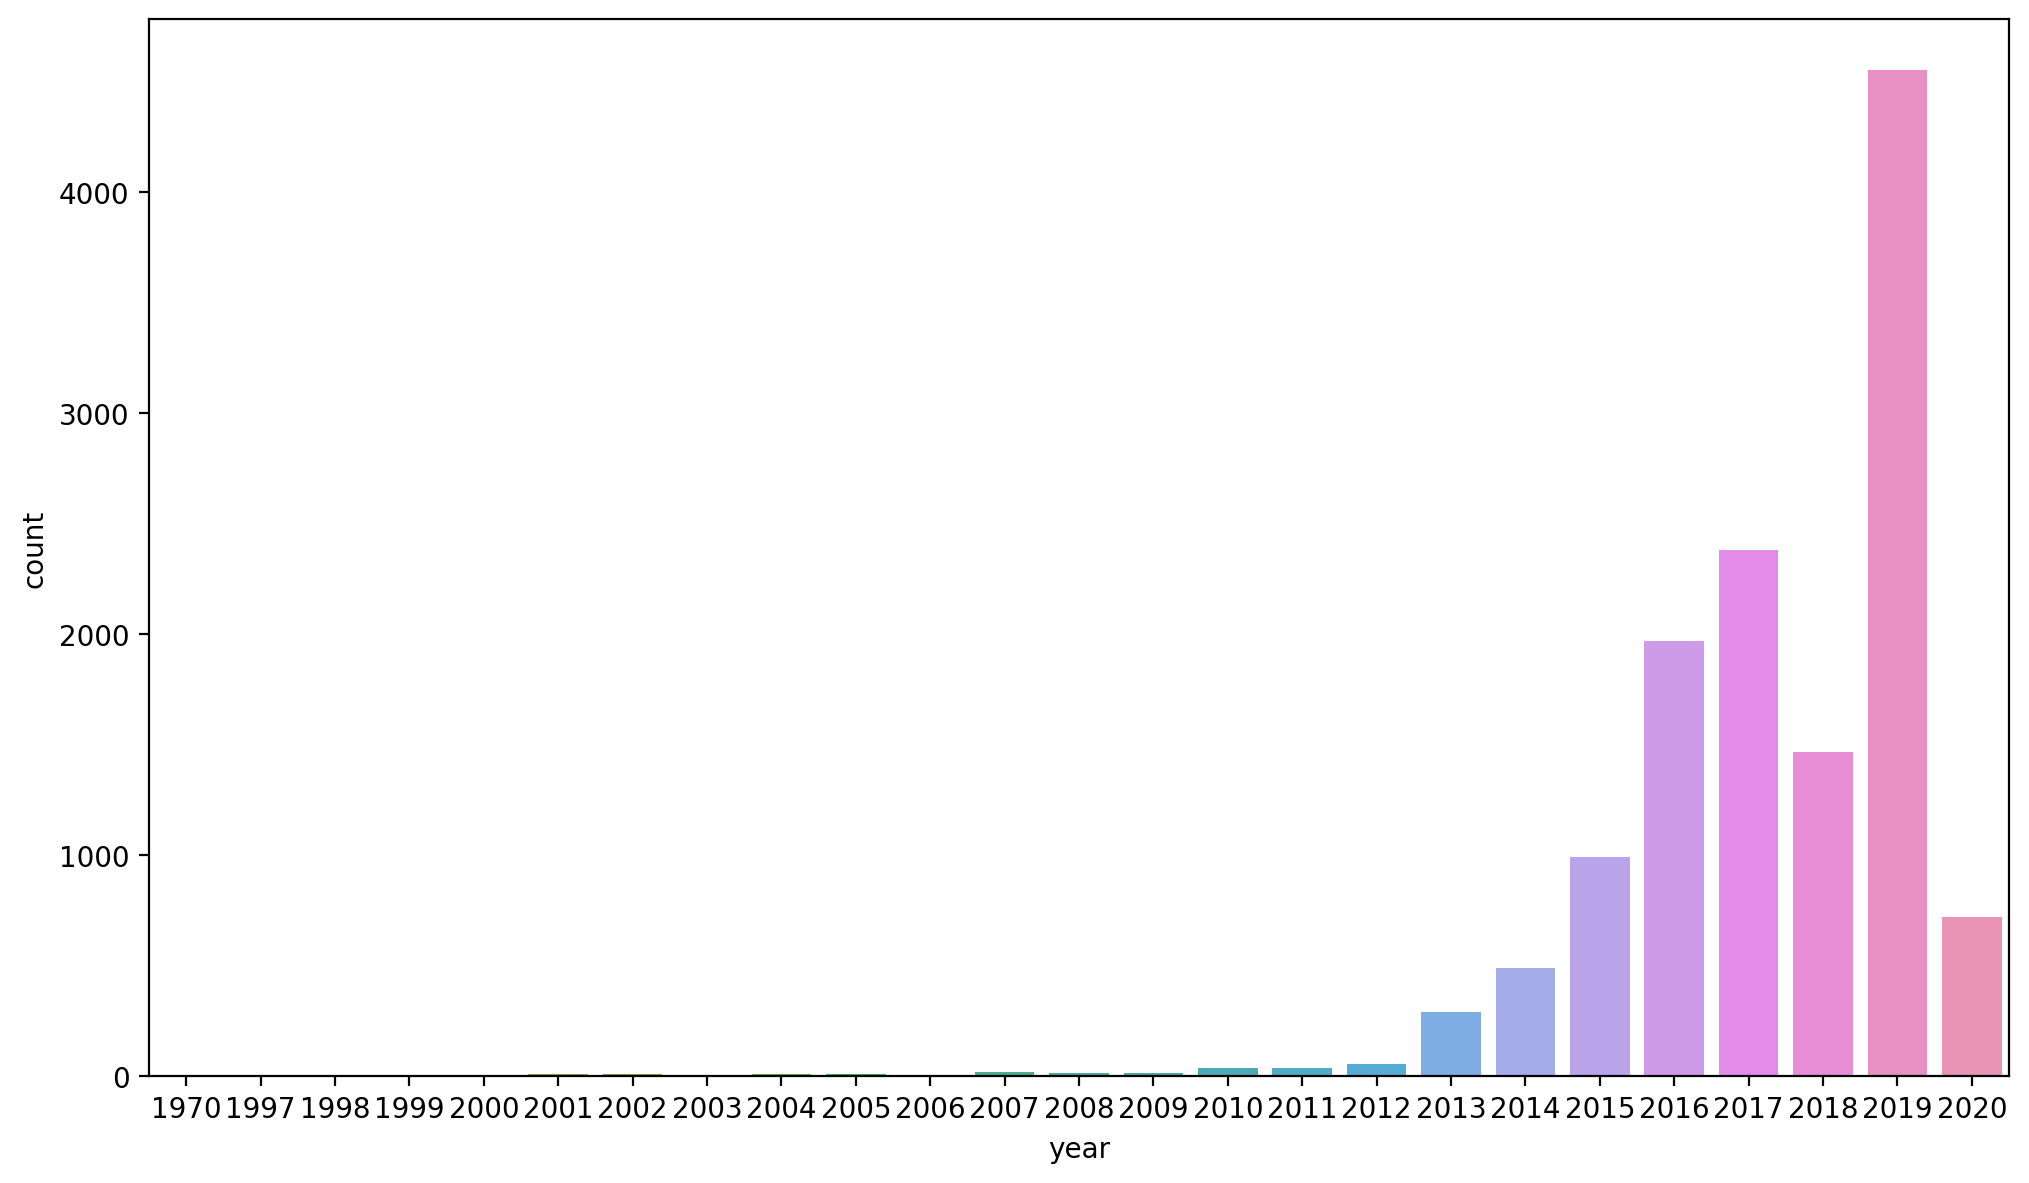

In [8]:
# Grafikten de görüldüğü üzere yüksek fiyatlı değerler aslında
# baya az ve fiyat üzerinde olumsuz etki oluşturuyorlar. Sadece
# fiyat yükseltiyorlar. Bundan dolayı onların belli bir kısımını
# çıkararak daha doğru bir tahmin elde etmeye çalışacaz.

# Şimdi yıllara göre dağılımına bakmak istiyoruz arabaların

plt.figure(figsize=(12, 7), dpi = 200)
sbn.countplot(x = dataFrame["year"])
plt.show()

In [9]:
dataFrame.corr()
# değerlerin birbiri ile korelasyonunu gösterir.

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [10]:
dataFrame.corr()["price"].sort_values()
# direk istediğimiz değeri getirip küçükten büyüğe diziyor.

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

In [11]:
dataFrame.sort_values("price", ascending = False).head(15)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [12]:
dataFrame.sort_values("price", ascending = True).head(15)

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [13]:
len(dataFrame)

13119

In [14]:
len(dataFrame) * 0.01
# Bu verileri price değerlerine göre sıralarsak en pahalı
# 131 aracı yani verilerin %1 'ini atarız. Böylece yüksek
# fiyatlılar modelimizi bozmaz.

131.19

In [15]:
v1dataFrame = dataFrame.sort_values("price", ascending= False).iloc[131:]

In [16]:
v1dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


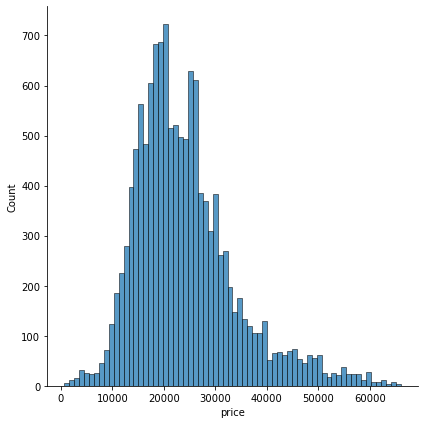

In [17]:
sbn.displot(v1dataFrame["price"], height = 6, aspect = 1)

In [18]:
v1dataFrame.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [19]:
# datamızda 1970 yılından olan arabalar var ve fiyatları 
# çok fazla muhtemelen antika olma durumundan kaynaklı
# ama biz özel durumlar değil genel durumlar için tahmin 
# yapacak bir model oluşturmaya çalışıyoruz. Bundan doalyı
# 70'lere ait verileri silelim

v1dataFrame = v1dataFrame[v1dataFrame.year != 1970]

In [20]:
v1dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [21]:
# transmission kolonuna ihityacımız yok
v1dataFrame = v1dataFrame.drop("transmission", axis = 1)

In [22]:
v1dataFrame.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


In [23]:
v1dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [24]:
print(v1dataFrame[v1dataFrame != 1970].isnull().sum())

year          0
price         0
mileage       0
tax           0
mpg           0
engineSize    0
dtype: int64


In [25]:
y = v1dataFrame["price"].values
x = v1dataFrame.drop("price", axis = 1).values

In [26]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [27]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 10)

In [30]:
len(x_train)

8701

In [31]:
len(x_test)

4286

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
# x_train = scaler.fit_transform(x_train) şeklinde de yapabiliriz.
scaler.fit(x_train)

MinMaxScaler()

In [35]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
model = Sequential()

model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))

model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mse")

In [38]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 300, epochs = 300)
# buradaki validation_data değeri 
# bizim önceki örnekte Los değerini bulduğumuz 
# değerleri ifade etmekte. direk verimiş oluyoruz.

Epoch 1/300
30/30 [==============================] - 1s 11ms/step - loss: 672187648.0000 - val_loss: 686586432.0000
Epoch 2/300
30/30 [==============================] - 0s 4ms/step - loss: 672175168.0000 - val_loss: 686573184.0000
Epoch 3/300
30/30 [==============================] - 0s 3ms/step - loss: 672154176.0000 - val_loss: 686539520.0000
Epoch 4/300
30/30 [==============================] - 0s 4ms/step - loss: 672103040.0000 - val_loss: 686460160.0000
Epoch 5/300
30/30 [==============================] - 0s 4ms/step - loss: 671985856.0000 - val_loss: 686283136.0000
Epoch 6/300
30/30 [==============================] - 0s 3ms/step - loss: 671714432.0000 - val_loss: 685853760.0000
Epoch 7/300
30/30 [==============================] - 0s 4ms/step - loss: 671080448.0000 - val_loss: 684909376.0000
Epoch 8/300
30/30 [==============================] - 0s 4ms/step - loss: 669775680.0000 - val_loss: 683072960.0000
Epoch 9/300
30/30 [==============================] - 0s 4ms/step - loss: 667381

30/30 [==============================] - 0s 4ms/step - loss: 74056440.0000 - val_loss: 75042360.0000
Epoch 73/300
30/30 [==============================] - 0s 4ms/step - loss: 73741328.0000 - val_loss: 74709888.0000
Epoch 74/300
30/30 [==============================] - 0s 4ms/step - loss: 73380528.0000 - val_loss: 74457328.0000
Epoch 75/300
30/30 [==============================] - 0s 4ms/step - loss: 73054656.0000 - val_loss: 74145848.0000
Epoch 76/300
30/30 [==============================] - 0s 5ms/step - loss: 72738712.0000 - val_loss: 73800184.0000
Epoch 77/300
30/30 [==============================] - 0s 3ms/step - loss: 72392360.0000 - val_loss: 73424056.0000
Epoch 78/300
30/30 [==============================] - 0s 3ms/step - loss: 72068024.0000 - val_loss: 73154536.0000
Epoch 79/300
30/30 [==============================] - 0s 3ms/step - loss: 71733488.0000 - val_loss: 72804744.0000
Epoch 80/300
30/30 [==============================] - 0s 3ms/step - loss: 71432832.0000 - val_loss: 7

30/30 [==============================] - 0s 5ms/step - loss: 49139836.0000 - val_loss: 50503832.0000
Epoch 144/300
30/30 [==============================] - 0s 7ms/step - loss: 49412920.0000 - val_loss: 50518564.0000
Epoch 145/300
30/30 [==============================] - 0s 5ms/step - loss: 48611616.0000 - val_loss: 49868156.0000
Epoch 146/300
30/30 [==============================] - 0s 5ms/step - loss: 48247748.0000 - val_loss: 49532072.0000
Epoch 147/300
30/30 [==============================] - 0s 5ms/step - loss: 47909456.0000 - val_loss: 49200432.0000
Epoch 148/300
30/30 [==============================] - 0s 5ms/step - loss: 47564212.0000 - val_loss: 48847908.0000
Epoch 149/300
30/30 [==============================] - 0s 5ms/step - loss: 47311108.0000 - val_loss: 48551796.0000
Epoch 150/300
30/30 [==============================] - 0s 6ms/step - loss: 46911924.0000 - val_loss: 48159756.0000
Epoch 151/300
30/30 [==============================] - 0s 5ms/step - loss: 46530628.0000 - val

30/30 [==============================] - 0s 6ms/step - loss: 32313624.0000 - val_loss: 33559704.0000
Epoch 215/300
30/30 [==============================] - 0s 5ms/step - loss: 32136418.0000 - val_loss: 33407056.0000
Epoch 216/300
30/30 [==============================] - 0s 5ms/step - loss: 31978016.0000 - val_loss: 33272650.0000
Epoch 217/300
30/30 [==============================] - 0s 5ms/step - loss: 31840550.0000 - val_loss: 33144484.0000
Epoch 218/300
30/30 [==============================] - 0s 5ms/step - loss: 31751808.0000 - val_loss: 33012078.0000
Epoch 219/300
30/30 [==============================] - 0s 4ms/step - loss: 31561002.0000 - val_loss: 32861564.0000
Epoch 220/300
30/30 [==============================] - 0s 5ms/step - loss: 31442380.0000 - val_loss: 32721890.0000
Epoch 221/300
30/30 [==============================] - 0s 5ms/step - loss: 31291144.0000 - val_loss: 32581576.0000
Epoch 222/300
30/30 [==============================] - 0s 5ms/step - loss: 31145196.0000 - val

30/30 [==============================] - 0s 5ms/step - loss: 24565638.0000 - val_loss: 25786580.0000
Epoch 286/300
30/30 [==============================] - 0s 5ms/step - loss: 24478338.0000 - val_loss: 25740706.0000
Epoch 287/300
30/30 [==============================] - 0s 5ms/step - loss: 24404084.0000 - val_loss: 25650798.0000
Epoch 288/300
30/30 [==============================] - 0s 5ms/step - loss: 24343926.0000 - val_loss: 25592928.0000
Epoch 289/300
30/30 [==============================] - 0s 5ms/step - loss: 24271416.0000 - val_loss: 25517836.0000
Epoch 290/300
30/30 [==============================] - 0s 5ms/step - loss: 24348888.0000 - val_loss: 25453264.0000
Epoch 291/300
30/30 [==============================] - 0s 6ms/step - loss: 24190978.0000 - val_loss: 25408772.0000
Epoch 292/300
30/30 [==============================] - 0s 5ms/step - loss: 24091118.0000 - val_loss: 25333072.0000
Epoch 293/300
30/30 [==============================] - 0s 5ms/step - loss: 24045882.0000 - val

In [39]:
kayipVerisi = pd.DataFrame(model.history.history)

In [40]:
kayipVerisi.head(5)

,loss,val_loss
0,672187648.0,686586432.0
1,672175168.0,686573184.0
2,672154176.0,686539520.0
3,672103040.0,686460160.0
4,671985856.0,686283136.0


<AxesSubplot:>

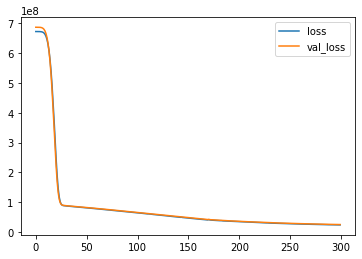

In [41]:
kayipVerisi.plot()

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
tahminDizisi = model.predict(x_test) 
# test etmek için ayırdığımız veriler için
# modelimizden fiyat tahmini yapmasını istiyoruz.

134/134 [==============================] - 0s 1ms/step


In [44]:
tahminDizisi

array([[21290.045],
       [28471.896],
       [25042.705],
       ...,
       [10720.216],
       [18595.643],
       [30295.717]], dtype=float32)

In [45]:
mean_absolute_error(y_test, tahminDizisi) 
# gerçek değerler ve tahminler arasında 
# ortalama 3600 pound'kuj bir fark varmış.

3523.748115258299

In [46]:
v1dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


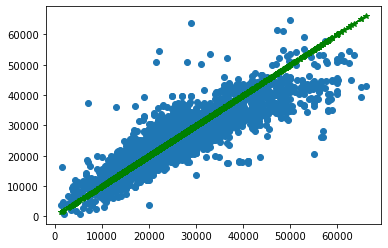

In [47]:
# bizim ortalama pricesımız 24 bin pound
# sapmamız ise 3600. Oluşturduğumuz modelin
# sapma değeri iyi mi kötü mü bu bizim bekl-
# entimize göre değişebilir. Eğer memnun de-
# ğilsek epoch değişimi veya layer/nöron de-
# ğişimi yapabiliriz ya da verileri biraz daha
# temizleriz ama overfitting'ten kaçınarak yapmalıyız.
plt.scatter(y_test, tahminDizisi)
plt.plot(y_test, y_test, "g*-")

In [48]:
v1dataFrame.head(10)

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
8083,2018,64999,41102,145,23.0,5.5
267,2019,64998,313,145,31.4,4.7
2956,2020,64980,3999,145,40.4,3.0
2274,2020,64980,3999,145,40.4,3.0
12160,2018,64950,13000,145,28.5,3.0


In [49]:
v1dataFrame.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [71]:
yeniArabaSerisi =  v1dataFrame.drop("price", axis = 1).iloc[2]

In [72]:
yeniArabaSerisi

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [73]:
type(yeniArabaSerisi)

pandas.core.series.Series

In [74]:
yeniArabaSerisi = scaler.transform(yeniArabaSerisi.values.reshape(-1, 5))

In [75]:
type(yeniArabaSerisi)

numpy.ndarray

In [76]:
yeniArabaSerisi.shape

(1, 5)

In [77]:
print(yeniArabaSerisi)

[[1.         0.01543635 0.25       0.12442183 0.64516129]]


In [78]:
model.predict(yeniArabaSerisi)

1/1 [==============================] - 0s 34ms/step


array([[53137.504]], dtype=float32)